# 📈 삼쩜삼 서비스 매출 증진 전략 

## 1. 프로젝트 목표
- 고객의 결제여부에 영향을 미치는 요인들 찾기
- 고객의 수수료 결제금액의 합을 높히기 위한 전략 제시

### 데이터 정보
1. 고객이 각 귀속년도별
1. 근로 / 사업 / 기타 소득에 대한 예상환급액과 수수료를 조회한 뒤
1. 결제를 하거나 하지 않은 여부를 저장

### 컬럼 정보
- age: 고객의 만 나이입니다. 
- gender: 고객의 성별입니다.
- year: 소득이 발생한 연도(귀속년도)입니다.
- refund: 예상환급액입니다.
- fee: 수수료입니다.
- has_paid: 수수료를 결제했는지의 여부
- income_근로: 고객의 근로소득(월급/일용직급여)
- income_사업: 고객의 사업소득(프리랜서 소득)
- income_기타: 고객의 기타소득(그외 기타 소득)

### 사전 준비

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 100)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rc('font', family="NanumGothic")

### 데이터 로딩하기

In [2]:
df = pd.read_csv("Jobis_3o3.csv")

print(df.shape)
df.head()

(100000, 9)


,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   age        100000 non-null  float64
 1   gender     100000 non-null  object 
 2   year       100000 non-null  int64  
 3   refund     100000 non-null  float64
 4   fee        100000 non-null  float64
 5   has_paid   100000 non-null  bool   
 6   income_근로  40791 non-null   float64
 7   income_사업  78227 non-null   float64
 8   income_기타  25260 non-null   float64
dtypes: bool(1), float64(6), int64(1), object(1)
memory usage: 6.2+ MB


- 10000개의 데이터
- 결측치 없음

True     0.64643
False    0.35357
Name: has_paid, dtype: float64

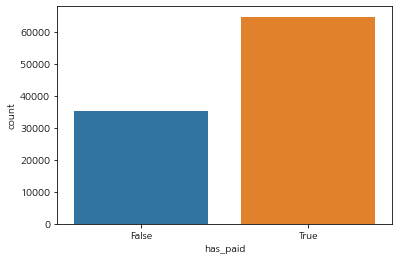

In [4]:
# 일단 전체 구매율을 확인합니다
sns.countplot(data=df, x="has_paid")

df["has_paid"].value_counts(normalize=True) #약 65%가 결제함

## 컬럼별 살펴보기

- 나이: 구간 나누어 탐색
- 성별
- 귀속년도
- 환급액
- 수수료: 예상환급액(refund)대비 퍼센티지 및 매출액(has_paid true인 경우) 추가
- income: 근로, 사업, 기타 소득 유무로 8구간으로 나누어 탐색

In [5]:
# 환급예상액 대비 수수료(요율)가 몇 퍼센트인지를 알려주는 ratio 컬럼을 추가합니다
df["ratio"] = (df["fee"]/df["refund"]*100).replace([np.inf, -np.inf], 0).round()

print(df.shape)
df.head()

(100000, 10)


,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,ratio
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN,8.0
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0,2.0
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN,4.0
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN,4.0
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN,4.0


In [6]:
# 실제 매출을 알려주는 revenue 컬럼을 추가합니다
df["revenue"] = df["fee"]*df["has_paid"]
df["revenue"].replace(0, np.nan, inplace=True) #매출액 내에서 계산할 수 있도록 0은 nan 처리 합니다

print(df.shape)
df.head()

(100000, 11)


,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,ratio,revenue
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN,8.0,NaN
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0,2.0,1700.0
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN,4.0,NaN
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN,4.0,NaN
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN,4.0,4300.0


In [7]:
df.describe()

,age,year,refund,fee,income_근로,income_사업,income_기타,ratio,revenue
count,100000.00000,100000.000000,1.000000e+05,100000.000000,4.079100e+04,7.822700e+04,2.526000e+04,100000.000000,64643.000000
mean,29.00096,2018.111300,2.081422e+05,7247.641000,6.432597e+06,1.511712e+06,6.362834e+05,3.496380,6209.493681
std,7.76819,1.495812,3.071744e+05,11926.896979,6.583716e+06,2.449810e+06,1.484947e+06,8.504598,9626.050173
min,15.00000,2015.000000,-8.265000e+06,400.000000,0.000000e+00,0.000000e+00,0.000000e+00,-8.000000,400.000000
25%,24.00000,2017.000000,3.300000e+04,400.000000,1.616000e+06,1.770000e+05,8.200000e+04,2.000000,400.000000
50%,27.00000,2018.000000,9.900000e+04,4300.000000,4.507000e+06,6.190000e+05,2.130000e+05,3.000000,3000.000000
75%,31.00000,2019.000000,2.540000e+05,8500.000000,9.301000e+06,1.601000e+06,5.820000e+05,4.000000,8500.000000
max,81.00000,2020.000000,7.725000e+06,307000.000000,1.823350e+08,3.993400e+07,6.281000e+07,1595.000000,307000.000000


- 나이(age): 중앙값이 27세, 75%가 31세 >> 주 고객은 20대. 15세와 81세가 특이. 정렬로 이상치일지 확인해보면 좋겠다
- 귀속연도(year): 2015년 ~ 2020년. 5년단위로 검색되므로 동일 유저로 볼 수 있다
- 환급예상액(refund): 음수가 발견된다**
- 수수료(fee): 적어도 25%는 단 400원이고, 75%는 적어도 1만원을 넘지 않는다
- 요율(ratio): 100%를 넘는 경우들이 있음 >> 수수료가 환급액보다 높은 경우 발생. 음수도 있음
- 매출(revenue): 실결제자와 미결제자간 중앙값을 제외하고 나머지 지표는 동일. 중앙값만 조금 낮음. 

### 중요하게 생각하는 순으로 검토

# 1. 소득원

### 소득원을 기준으로 8개로 분류

소비자를 근로소득, 사업소득, 기타소득을 기준으로 8개 분류

근로소득: 직장인
사업소득: 프리랜서, 아르바이트 등
기타소득: 따로 주수입이 있으면서 단기로 투잡, 무형자산의 양도대여소득, 복권 당첨 외 경품 수취 등

****삼쩜삼 서비스는 프리랜서, 자영업자, 특수고용노동자, 학원 강사 등이 납부하는 종합소득세를 대상으로 함 (사업소득)**

In [8]:
# 소득원별 분류 만들어 income 컬럼에 넣어주기

df.loc[df["income_근로"].notnull() & df["income_사업"].notnull() & df["income_기타"].notnull(), "income"] = "근o사o기o"
df.loc[df["income_근로"].notnull() & df["income_사업"].notnull() & df["income_기타"].isnull(), "income"] = "근o사o기x"
df.loc[df["income_근로"].notnull() & df["income_사업"].isnull() & df["income_기타"].notnull(), "income"] = "근o사x기o"
df.loc[df["income_근로"].notnull() & df["income_사업"].isnull() & df["income_기타"].isnull(), "income"] = "근o사x기x"
df.loc[df["income_근로"].isnull() & df["income_사업"].notnull() & df["income_기타"].notnull(), "income"] = "근x사o기o"
df.loc[df["income_근로"].isnull() & df["income_사업"].notnull() & df["income_기타"].isnull(), "income"] = "근x사o기x"
df.loc[df["income_근로"].isnull() & df["income_사업"].isnull() & df["income_기타"].notnull(), "income"] = "근x사x기o"
df.loc[df["income_근로"].isnull() & df["income_사업"].isnull() & df["income_기타"].isnull(), "income"] = "근x사x기x"

print(df.shape)
df[["income", "income_근로", "income_사업", "income_기타"]].head()

(100000, 12)


,income,income_근로,income_사업,income_기타
0,근o사o기x,10001000.0,61000.0,NaN
1,근o사x기o,18092000.0,NaN,1815000.0
2,근x사o기x,NaN,1461000.0,NaN
3,근x사o기x,NaN,2471000.0,NaN
4,근o사o기x,0.0,689000.0,NaN


<AxesSubplot:xlabel='income', ylabel='count'>

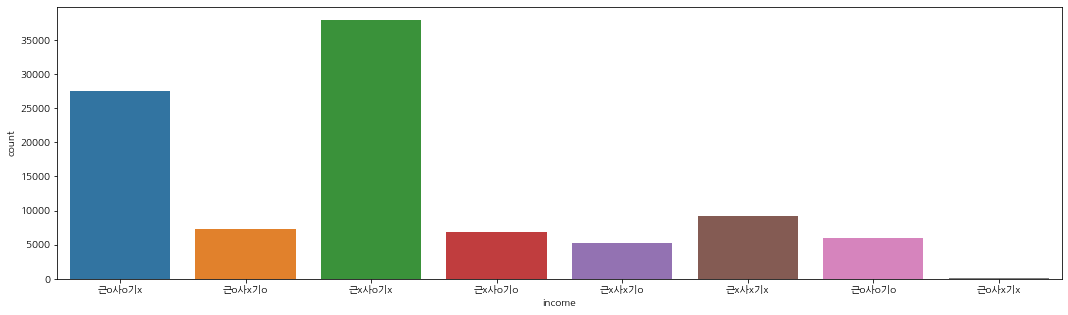

In [9]:
# 소득원별 조회 수 시각화하기
plt.figure(figsize = (18,5))
sns.countplot(data=df, x="income")

**다음 순으로 조회 수가 많음을 확인함**
1. 근로소득x, 사업소득o, 기타소득x (3만5천명 이상)
1. 근로소득o, 사업소득o, 기타소득x (2만5천명 이상)
1. 근로소득x, 사업소득x, 기타소득x (5천명~1만명 사이)
1. 근로소득o, 사업소득x, 기타소득o (5천명~1만명 사이)
1. 근로소득x, 사업소득o, 기타소득o (5천명~1만명 사이)
1. 근로소득o, 사업소득o, 기타소득o (5천명~1만명 사이)
1. 근로소득x, 사업소득x, 기타소득o (5천명~1만명 사이)
1. 근로소득o, 사업소득x, 기타소득x (모수 적음)

---

**insight**
1. 사업소득이 있는 사람 중 기타소득이 없는 사람이 압도적인 이용자(조회)
1. 그 외에는 비슷함

<AxesSubplot:xlabel='income', ylabel='Probability'>

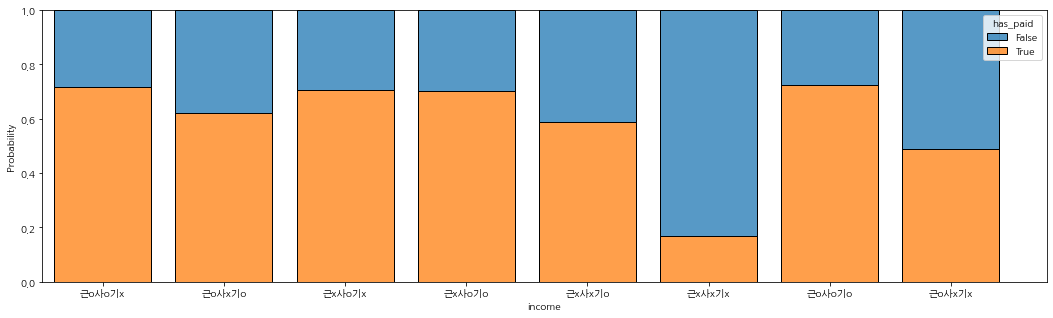

In [10]:
# 소득원별 결제율 시각화하기
plt.figure(figsize = (18,5))
sns.histplot(df, x="income", hue="has_paid", stat="probability", multiple="fill", shrink=0.8)

In [11]:
# 실제 퍼센티지

print(len(df.loc[(df["income"]=="근o사o기o") & df["has_paid"]==True]) / len(df.loc[df["income"]=="근o사o기o"]))
print(len(df.loc[(df["income"]=="근o사o기x") & df["has_paid"]==True]) / len(df.loc[df["income"]=="근o사o기x"]))
print(len(df.loc[(df["income"]=="근o사x기o") & df["has_paid"]==True]) / len(df.loc[df["income"]=="근o사x기o"]))
print(len(df.loc[(df["income"]=="근o사x기x") & df["has_paid"]==True]) / len(df.loc[df["income"]=="근o사x기x"]))
print(len(df.loc[(df["income"]=="근x사o기o") & df["has_paid"]==True]) / len(df.loc[df["income"]=="근x사o기o"]))
print(len(df.loc[(df["income"]=="근x사o기x") & df["has_paid"]==True]) / len(df.loc[df["income"]=="근x사o기x"]))
print(len(df.loc[(df["income"]=="근x사x기o") & df["has_paid"]==True]) / len(df.loc[df["income"]=="근x사x기o"]))
print(len(df.loc[(df["income"]=="근x사x기x") & df["has_paid"]==True]) / len(df.loc[df["income"]=="근x사x기x"]))

0.7239304812834224
0.7152674253717777
0.6216104039845047
0.4868421052631579
0.7023406447813926
0.7039555169051572
0.5876308277830637
0.16681137399609292


**다음 순으로 구매율이 높음을 확인함**
1. 근로소득o, 사업소득o, 기타소득o (0.72)
1. 근로소득o, 사업소득o, 기타소득x (0.71) : 조회수 2번째로 많음 (2만5천명 이상)
1. 근로소득x, 사업소득o, 기타소득x (0.70) : 조회수 1번째로 많음 (3만5천명 이상)
1. 근로소득x, 사업소득o, 기타소득o (0.70)
1. 근로소득o, 사업소득x, 기타소득o (0.62)
1. 근로소득x, 사업소득x, 기타소득o (0.58)
1. 근로소득o, 사업소득x, 기타소득x (0.48)
1. 근로소득x, 사업소득x, 기타소득x (0.16)

---

**insight**
1. 사업소득이 있는 사람: 전부 70% 이상의 결제율을 보임

# 매출

In [12]:
# 소득원 유형에 따른 총 매출액 순위
df.groupby("income").sum().sort_values(by="revenue", ascending=False)

,age,year,refund,fee,has_paid,income_근로,income_사업,income_기타,ratio,revenue
income,,,,,,,,,,
근x사o기x,1070344.0,76579158,8.243267e+09,288592200.0,26713,0.000000e+00,6.489452e+10,0.000000e+00,131447.0,168824400.0
근o사o기x,806046.0,55511114,4.904695e+09,165571700.0,19672,1.372653e+11,3.789063e+10,0.000000e+00,97797.0,110519300.0
근x사o기o,191509.0,13708889,1.788622e+09,66160900.0,4771,0.000000e+00,8.570398e+09,3.199553e+09,27610.0,34780900.0
근o사o기o,185116.0,12077822,1.422761e+09,51149900.0,4332,4.453594e+10,6.901160e+09,3.185542e+09,24292.0,30425400.0
근o사x기o,223553.0,14589332,1.437185e+09,52198600.0,4493,8.023949e+10,0.000000e+00,4.880564e+09,20852.0,26399100.0
근x사x기o,140177.0,10605356,1.623377e+09,60870300.0,3088,0.000000e+00,0.000000e+00,4.806860e+09,15248.0,24747300.0
근x사x기x,280815.0,18586085,1.387291e+09,40025800.0,1537,0.000000e+00,0.000000e+00,0.000000e+00,32161.0,5584800.0
근o사x기x,2536.0,153374,7.026000e+06,194700.0,37,3.513280e+08,0.000000e+00,0.000000e+00,231.0,119100.0


In [13]:
df.groupby("income").mean().sort_values(by="revenue", ascending=False)

,age,year,refund,fee,has_paid,income_근로,income_사업,income_기타,ratio,revenue
income,,,,,,,,,,
근x사x기o,26.674976,2018.145766,308920.456708,11583.311132,0.587631,NaN,NaN,914721.217888,2.901618,8014.022021
근x사o기o,28.192110,2018.090534,263303.694980,9739.570146,0.702341,NaN,1.261651e+06,471007.360518,4.064478,7290.064976
근o사o기o,30.935160,2018.352607,237760.862299,8547.777406,0.723930,7.442503e+06,1.153269e+06,532343.248663,4.059492,7023.407202
근x사o기x,28.206288,2018.055657,217231.059109,7605.138746,0.703956,NaN,1.710136e+06,NaN,3.463963,6319.934114
근o사x기o,30.928749,2018.446597,198835.777532,7221.721085,0.621610,1.110120e+07,NaN,675230.215827,2.884892,5875.606499
근o사o기x,29.307566,2018.365778,178333.090936,6020.132349,0.715267,4.990921e+06,1.377691e+06,NaN,3.555867,5618.101871
근x사x기x,30.476992,2017.157044,150563.381810,4344.019970,0.166811,NaN,NaN,NaN,3.490449,3633.571893
근o사x기x,33.368421,2018.078947,92447.368421,2561.842105,0.486842,4.622737e+06,NaN,NaN,3.039474,3218.918919


매출액 순위: 
1. 근로소득x, 사업소득o, 기타소득x 168,824,400원 (구매율3위, 0.70), 조회수 1번째로 많음 (3만5천명 이상) **확실히 조회수가 압도적**
1. 근로소득o, 사업소득o, 기타소득x 110,519,300원(구매율2위, 0.71), 조회수 2번째로 많음 (2만5천명 이상) **확실히 조회수가 압도적**
1. 근로소득x, 사업소득o, 기타소득o 34,780,900원 (구매율4위, 0.70)
1. 근로소득o, 사업소득o, 기타소득o 30,425,400원 (구매율1위, 0.72)
1. 근로소득o, 사업소득x, 기타소득o 26,399,100원 (구매율5위, 0.62)
1. 근로소득x, 사업소득x, 기타소득o 24,747,300원 (구매율6위, 0.58)
1. 근로소득x, 사업소득x, 기타소득x 5,584,800원 (구매율7위, 0.16)
1. 근로소득o, 사업소득x, 기타소득x 119,100원 (구매율7위, 0.48) **모수 확연히 적었던 집단**

# 나이

### 사전 질문

Q. 나이의 기준은 귀속년도인가, 현재(조회시점)인가? (결론: 현재 기준)

In [14]:
# 전체 데이터 중 15세의 데이터가 단 1개 발견(특정 가능): 2016년, 여성
# 2017년에 16세 여성 데이터가 없으므로, age는 귀속년도가 기준이 아니라 현재(조회시점) 나이가 기준일 가능성이 높음
df[df["age"]<17].sort_values(by=["age", "year"])

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,ratio,revenue,income
15685,15.0,F,2016,5000.0,400.0,True,NaN,32000.0,NaN,8.0,400.0,근x사o기x
14250,16.0,F,2018,34000.0,400.0,True,NaN,NaN,31000.0,1.0,400.0,근x사x기o
19722,16.0,F,2018,8000.0,400.0,False,NaN,51000.0,NaN,5.0,NaN,근x사o기x
57141,16.0,M,2018,28000.0,400.0,True,NaN,NaN,128000.0,1.0,400.0,근x사x기o
34495,16.0,M,2019,75000.0,1300.0,True,NaN,NaN,340000.0,2.0,1300.0,근x사x기o
57515,16.0,F,2019,4000.0,400.0,False,NaN,26000.0,NaN,10.0,NaN,근x사o기x
36983,16.0,M,2020,21000.0,400.0,True,NaN,127000.0,NaN,2.0,400.0,근x사o기x
59884,16.0,M,2020,28000.0,400.0,True,NaN,170000.0,NaN,1.0,400.0,근x사o기x
86031,16.0,M,2020,214000.0,8500.0,True,NaN,1297000.0,NaN,4.0,8500.0,근x사o기x
92509,16.0,M,2020,4000.0,400.0,False,NaN,26000.0,NaN,10.0,NaN,근x사o기x


[Text(0.5, 1.0, '연령별 결제 수')]

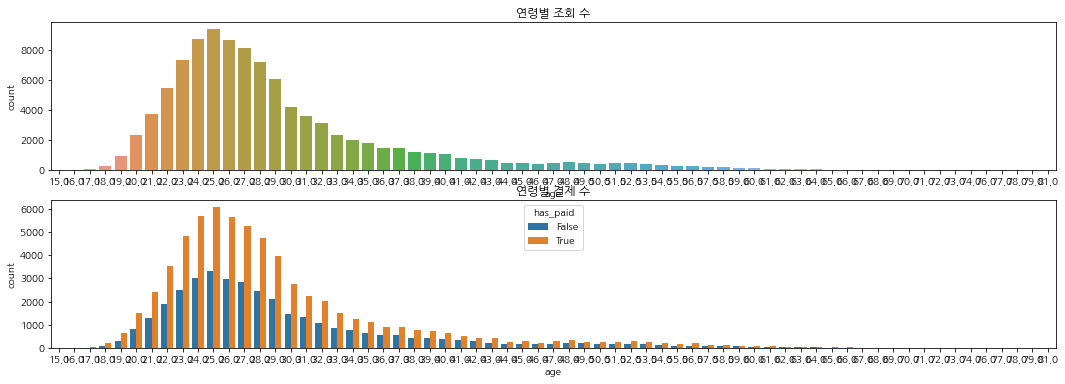

In [15]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18,6)

sns.countplot(data=df, x="age", ax=ax1).set(title="연령별 조회 수")
sns.countplot(data=df, x="age", hue="has_paid", ax=ax2).set(title="연령별 결제 수")

In [16]:
df["age"].value_counts().head(25)

25.0    9417
24.0    8713
26.0    8632
27.0    8126
23.0    7336
28.0    7209
29.0    6087
22.0    5443
30.0    4184
21.0    3702
31.0    3583
32.0    3098
33.0    2340
20.0    2312
34.0    2002
35.0    1767
37.0    1445
36.0    1436
38.0    1195
39.0    1132
40.0    1031
19.0     941
41.0     817
42.0     697
43.0     638
Name: age, dtype: int64

- 10만명 중 각 8000명 이상인 구간: 24~27세
- 10대, 40대 이상은 각 하나의 구간으로 묶음

In [17]:
df.loc[(df["age"] < 20), "agetype"] = "1019"
df.loc[(df["age"] >= 20) & (df["age"] < 24), "agetype"] = "2023"
df.loc[(df["age"] >= 24) & (df["age"] < 28), "agetype"] = "2427"
df.loc[(df["age"] >= 28) & (df["age"] < 32), "agetype"] = "2831"
df.loc[(df["age"] >= 32) & (df["age"] < 36), "agetype"] = "3235"
df.loc[(df["age"] >= 36) & (df["age"] < 40), "agetype"] = "3639"
df.loc[(df["age"] >= 40) & (df["age"] < 44), "agetype"] = "4043"
df.loc[(df["age"] >= 44), "agetype"] = "4481"

In [18]:
df["agetype"].value_counts()

2427    34888
2831    21063
2023    18793
3235     9207
4481     6379
3639     5208
4043     3183
1019     1279
Name: agetype, dtype: int64

[Text(0.5, 1.0, '나이구간별 결제 수')]

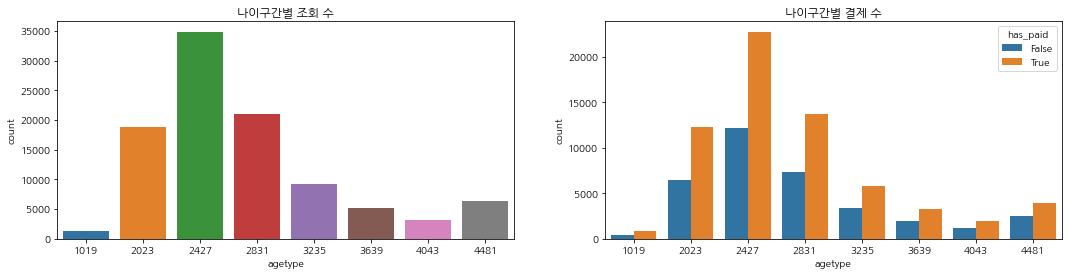

In [19]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,4)

sns.countplot(data=df, x="agetype", order=["1019", "2023", "2427", "2831", "3235", "3639", "4043", "4481"], ax=ax1).set(title="나이구간별 조회 수")
sns.countplot(data=df, x="agetype", hue="has_paid", order=["1019", "2023", "2427", "2831", "3235", "3639", "4043", "4481"], ax=ax2).set(title="나이구간별 결제 수")

# 귀속년도

[Text(0.5, 1.0, '귀속년도별 결제 수')]

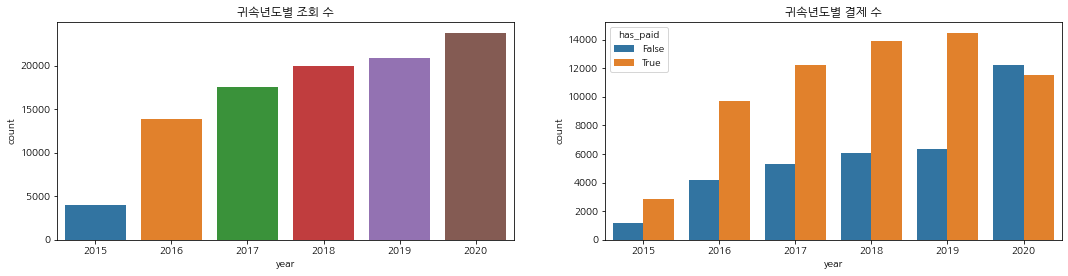

In [20]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,4)

sns.countplot(data=df, x="year", ax=ax1).set(title="귀속년도별 조회 수")
sns.countplot(data=df, x="year", hue="has_paid", ax=ax2).set(title="귀속년도별 결제 수")

- 통제 불가능한 변수이므로, 가볍게 현황만 보고 넘어감
- 왜 2020년만 결제율이 50%가 안되는거지... ??? >>> 24~27세 구간이 지금 인구가 제일 많은데 

# 환급액

In [21]:
# 환급액 음수 왜 이렇게 많고 높니... 환급액 826만원 토해내야되는 사람 fee는 4300원이고 23만원 토해내야되는 사람은 8500원이니

df.sort_values(by="refund").head(20)

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,ratio,revenue,income,agetype
98352,33.0,M,2018,-8265000.0,4300.0,True,NaN,690000.0,NaN,-0.0,4300.0,근x사o기x,3235
52858,34.0,M,2017,-2328000.0,400.0,False,16759000.0,28000.0,441000.0,-0.0,NaN,근o사o기o,3235
55168,28.0,F,2020,-1658000.0,1700.0,False,10509000.0,570000.0,NaN,-0.0,NaN,근o사o기x,2831
54256,48.0,F,2018,-948000.0,3000.0,True,8157000.0,3975000.0,NaN,-0.0,3000.0,근o사o기x,4481
94281,39.0,F,2020,-683000.0,39100.0,False,6082000.0,10649000.0,NaN,-6.0,NaN,근o사o기x,3639
70198,28.0,M,2020,-583000.0,900.0,False,8389000.0,298000.0,NaN,-0.0,NaN,근o사o기x,2831
52648,26.0,F,2020,-397000.0,1300.0,False,8175000.0,247000.0,NaN,-0.0,NaN,근o사o기x,2427
68881,33.0,M,2016,-322000.0,400.0,True,NaN,57000.0,NaN,-0.0,400.0,근x사o기x,3235
10034,34.0,M,2015,-231000.0,8500.0,True,8989000.0,1714000.0,NaN,-4.0,8500.0,근o사o기x,3235
83050,33.0,M,2017,-175000.0,400.0,False,8242000.0,386000.0,289000.0,-0.0,NaN,근o사o기o,3235


# 수수료

In [22]:
df.groupby("year").sum().sort_values(by="revenue", ascending=False)

,age,refund,fee,has_paid,income_근로,income_사업,income_기타,ratio,revenue
year,,,,,,,,,
2020,669420.0,7.483041e+09,285896300.0,11540,8.001132e+10,4.837722e+10,5.283276e+09,81984.0,109951500.0
2018,576235.0,3.585558e+09,119794600.0,13888,5.080949e+10,1.898561e+10,3.084520e+09,70345.0,79396200.0
2019,588329.0,3.625158e+09,121537700.0,14481,6.493703e+10,1.872475e+10,2.830180e+09,75609.0,78488400.0
2017,518487.0,3.091987e+09,102384500.0,12204,3.719144e+10,1.671362e+10,2.636504e+09,61337.0,68323300.0
2016,425091.0,2.380295e+09,77631100.0,9698,2.773271e+10,1.259903e+10,2.107579e+09,48459.0,52503700.0
2015,122534.0,6.481850e+08,17519900.0,2832,1.710070e+09,2.856483e+09,1.304600e+08,11904.0,12737200.0


In [23]:
df.groupby("year").mean().sort_values(by="fee", ascending=False)

,age,refund,fee,has_paid,income_근로,income_사업,income_기타,ratio,revenue
year,,,,,,,,,
2020,28.148179,314651.459087,12021.541502,0.485241,6.814694e+06,2.362054e+06,802807.476067,3.447313,9527.859619
2018,28.836261,179430.415853,5994.825602,0.694991,6.436469e+06,1.246838e+06,590564.809496,3.520242,5716.892281
2017,29.636296,176735.467276,5852.214919,0.697571,5.580112e+06,1.234388e+06,626396.768829,3.505973,5598.434939
2019,28.228049,173935.226946,5831.383744,0.694799,7.005829e+06,1.174407e+06,510586.325095,3.627723,5420.095297
2016,30.553511,171084.237763,5579.752749,0.697046,5.564348e+06,1.184565e+06,631957.721139,3.483002,5413.868839
2015,30.748808,162656.210790,4396.461731,0.710665,7.185168e+06,1.190697e+06,353550.135501,2.987202,4497.598870


# 요율

# 성별

M    50477
F    49501
-       22
Name: gender, dtype: int64

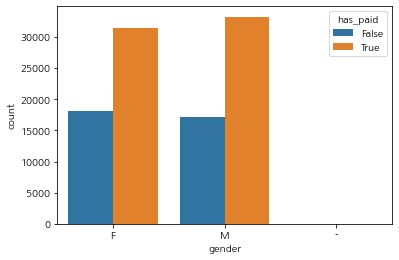

In [24]:
sns.countplot(data=df, x="gender", hue="has_paid")
df["gender"].value_counts()

<AxesSubplot:xlabel='gender', ylabel='Probability'>

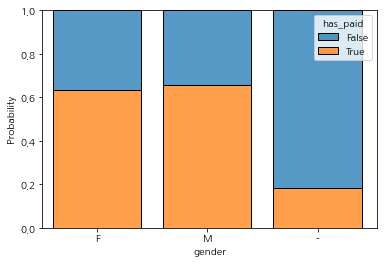

In [25]:
sns.histplot(df, x="gender", hue="has_paid", stat="probability", multiple="fill", shrink=.8)

In [26]:
print(df[df["gender"]=="F"]["has_paid"].value_counts(normalize=True)) #여성 결제 비율: 63.4%
print(df[df["gender"]=="M"]["has_paid"].value_counts(normalize=True)) #남성 결제 비율: 65.8%

True     0.634068
False    0.365932
Name: has_paid, dtype: float64
True     0.658755
False    0.341245
Name: has_paid, dtype: float64


- 남성(M), 여성(F) 외 22개의 알 수 없는 데이터가 있으나, 10만개 중 극소수이므로 큰 영향은 없음
- 남녀 비율은 남성이 살짝 더 높으나, 사실상 반반으로 봐도 무방
- 결제비율은 남성이 살짝 더 높으나, 유의미한정도인지는 잘 모르겠음

# 💳 결론 1: 결제 여부에 영향을 주는 요인

- 환급액
- 수수료

# 💰 결론2: 수수료 결제금액의 합을 높이기 위한 전략

- 결제율이 높은 구간의 조회 유입을 늘리기: 사업소득o, 기타소득x인 사람
- 수수료비율에 따라 결제율이 훅 떨어지는 구간에서 결제율 높이기: 수수료혜택 등
- 수수료 금액이 높은 구간의 결제율을 높이기: 소득이 높은 장년층 공략


- 데이터가 10만개이지만, 1인당 5개년분의 환급이 동시에 조회 및 처리되므로 실 유저수가 몇 명인지 확인요 >> 단순하게 생각하면 2000명 정도